## Import Libraries

In [43]:
# Import libraries yang diperlukan
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


## Load Dataset

In [44]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/Tasya85/MSIB-Insurance/refs/heads/main/insurance.csv"
df = pd.read_csv(url, delimiter=',')

# Display basic information about the dataset
df_info = df.info()
df_head = df.head()
df_description = df.describe()

df_info, df_head, df_description

# Check column names to verify separation
print("Kolom-kolom pada dataset:", df.columns)

# Display first 5 rows to verify
print("Lima baris pertama dataset:")
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
Kolom-kolom pada dataset: Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')
Lima baris pertama dataset:
   age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  nor

## Exploratory Data Analysis

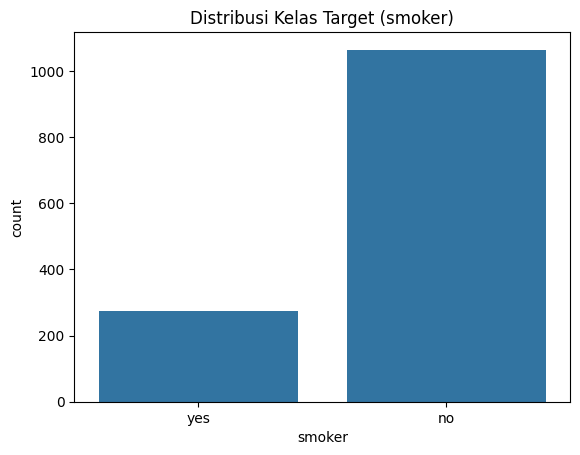

Jumlah nilai 'unknown' dalam setiap kolom:
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64


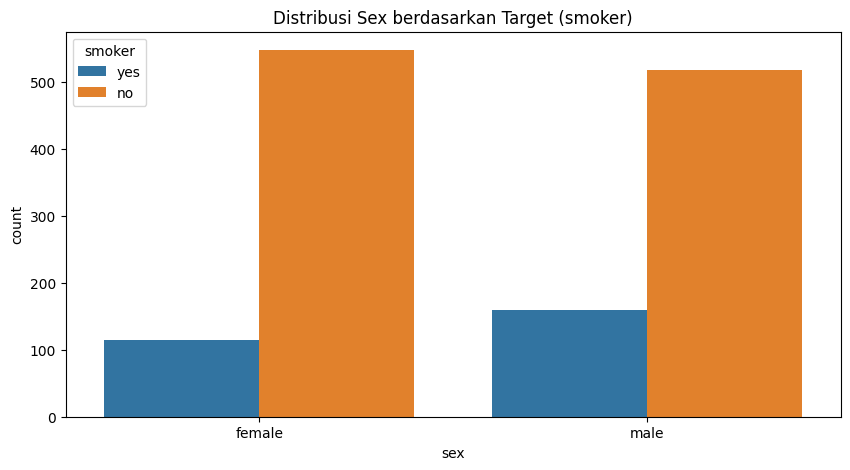

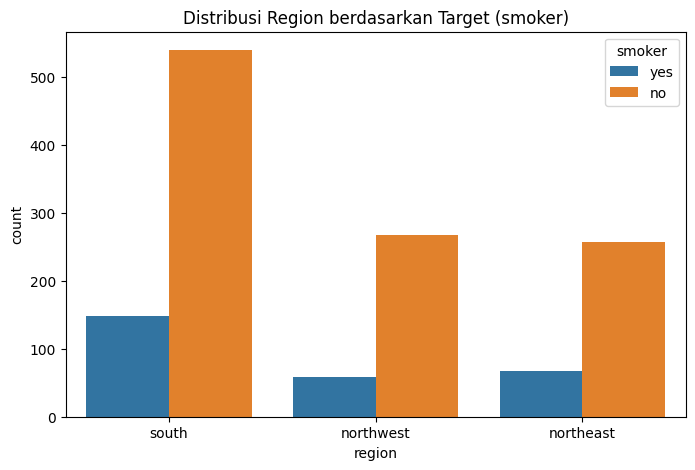

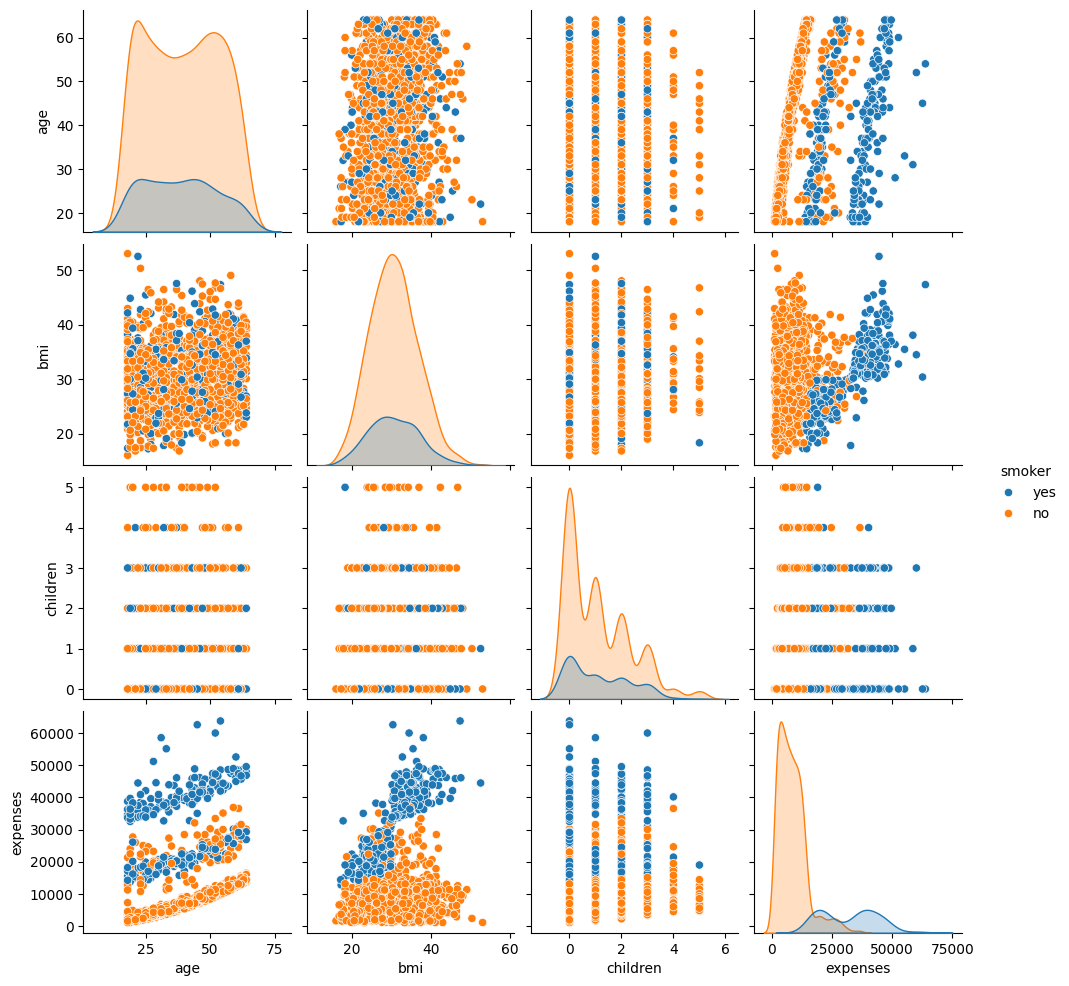

In [45]:

# 1. Plot distribusi kelas target (misalnya kolom 'smoker' sebagai contoh target untuk eksplorasi awal)
sns.countplot(x='smoker', data=df)
plt.title("Distribusi Kelas Target (smoker)")
plt.show()

# 2. Identifikasi dan tangani nilai 'unknown' dalam kolom tertentu
# Menghitung jumlah 'unknown' dalam setiap kolom
unknown_counts = df.apply(lambda x: x[x == 'unknown'].count())
print("Jumlah nilai 'unknown' dalam setiap kolom:\n", unknown_counts)

# Drop rows with 'unknown' values in critical columns if needed
df = df[(df['sex'] != 'unknown') & (df['region'] != 'unknown')]

# 3. Gabungkan nilai yang mirip
# Contoh: Gabungkan kategori yang mirip, misalnya di kolom 'region'
df['region'] = df['region'].replace({'southwest': 'south', 'southeast': 'south'})

# Visualisasi setelah preprocessing
# 4. Visualisasi distribusi 'sex' dan 'region' untuk melihat korelasinya dengan target 'smoker'
plt.figure(figsize=(10, 5))
sns.countplot(x='sex', hue='smoker', data=df)
plt.title("Distribusi Sex berdasarkan Target (smoker)")
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='region', hue='smoker', data=df)
plt.title("Distribusi Region berdasarkan Target (smoker)")
plt.show()

# 5. Pairplot pada beberapa fitur numerik dengan target smoker untuk melihat pola
sns.pairplot(df, vars=['age', 'bmi', 'children', 'expenses'], hue='smoker', diag_kind="kde")
plt.show()


## Machine Learning

In [46]:
from sklearn.model_selection import train_test_split

# 1. Splitting X (features) and y (target)
X = df.drop(columns=['expenses'])  # Menghapus kolom target dari fitur
y = df['expenses']  # Kolom target

# 2. Split data into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek bentuk (shape) dari X_train dan X_test
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)


Shape of X_train: (1070, 6)
Shape of X_test: (268, 6)


## Linear Regression


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. R-squared score <br>
e. Mean Squared Error <br>
f. Results and conclusion <br>

In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Menggunakan dataset yang sudah dibersihkan dan di-encode
# Pastikan kolom string diubah menggunakan One-Hot Encoding
df = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# 1. Memisahkan X (fitur) dan y (target)
X = df.drop(columns=['expenses'])  # Menghapus kolom target dari fitur
y = df['expenses']  # Kolom target

# 2. Membagi data menjadi training dan test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Mendefinisikan model
model = LinearRegression()

# b. Melatih model pada data training
model.fit(X_train, y_train)

# c. Memprediksi hasil set pengujian
y_pred = model.predict(X_test)

# d. Memeriksa skor akurasi (R-squared score)
r2 = r2_score(y_test, y_pred)
print("R-squared score:", r2)

# e. Menghitung Mean Squared Error sebagai alternatif metrik
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# f. Hasil dan kesimpulan
print("\nResults and Conclusion:")
print("The model's R-squared score is {:.2f}, indicating how well the model explains the variance.".format(r2))
print("The RMSE is {:.2f}, representing the average deviation from actual values.".format(rmse))


R-squared score: 0.7838363615826803
Mean Squared Error: 33559131.142112635
Root Mean Squared Error: 5793.0243519350615

Results and Conclusion:
The model's R-squared score is 0.78, indicating how well the model explains the variance.
The RMSE is 5793.02, representing the average deviation from actual values.


## Random Forest


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [49]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor  # Changed to regressor
from sklearn.metrics import mean_squared_error, r2_score  # Metrics for regression
from sklearn.model_selection import train_test_split

# Misalkan df adalah DataFrame Anda dan expense_category adalah target
X = df.drop(columns=['expenses'])
y = df['expenses']

# Identifying categorical columns (change as per your DataFrame structure)
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Data preprocessing with OneHotEncoder
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# a. Mendefinisikan dan melatih model dengan pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))  # Use regressor instead
])

# Data pembagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# b. Memprediksi hasil set pengujian
y_pred_rf = pipeline.predict(X_test)

# c. Check accuracy score using regression metrics
mse = mean_squared_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)
print("Random Forest Mean Squared Error:", mse)
print("Random Forest R^2 Score:", r2)

# f. Results and conclusion
print("\nResults and Conclusion:")
print(f"The Random Forest model achieved an R^2 score of {r2:.2f} with a mean squared error of {mse:.2f}.")


Random Forest Mean Squared Error: 21199821.098570973
Random Forest R^2 Score: 0.8634460933134018

Results and Conclusion:
The Random Forest model achieved an R^2 score of 0.86 with a mean squared error of 21199821.10.


## Gradient Boosting Classifier


---

a. Defining the model <br>
b. Predict the test set results <br>
c. Check accuracy score <br>
d. Confusion matrix <br>
e. Classification report <br>
f. Results and conclusion <br>

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Misalkan df adalah DataFrame Anda dan expenses adalah target
X = df.drop(columns=['expenses'])
y = df['expenses']

# Data pembagian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# a. Mendefinisikan model
model = GradientBoostingRegressor(random_state=42)

# b. Memprediksi hasil set pengujian
model.fit(X_train, y_train)  # Fit model
y_pred = model.predict(X_test)  # Predict on the test set

# c. Check accuracy score using R^2 score
r2 = r2_score(y_test, y_pred)
print("Gradient Boosting R^2 Score:", r2)

# d. Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# e. Hasil dan kesimpulan
print("\nResults and Conclusion:")
print(f"The Gradient Boosting model achieved an R^2 score of {r2:.2f} and a Mean Squared Error of {mse:.2f}.")


Gradient Boosting R^2 Score: 0.8781617482671694
Mean Squared Error: 18915234.30103492

Results and Conclusion:
The Gradient Boosting model achieved an R^2 score of 0.88 and a Mean Squared Error of 18915234.30.


# Summary of Model Performance

## Linear Regression
- **R-squared Score**: 0.78
- **Mean Squared Error (MSE)**: 33,559,131.14
- **Root Mean Squared Error (RMSE)**: 5,793.02

The Linear Regression model explains approximately 78% of the variance in the target variable ("expenses"). The RMSE indicates that, on average, the predictions deviate from actual expenses by about 5,793.02 units.

---

## Random Forest
- **R-squared Score**: 0.86
- **Mean Squared Error (MSE)**: 21,199,821.10

The Random Forest model significantly improves upon the Linear Regression model, explaining about 86% of the variance in expenses. The lower MSE indicates that Random Forest's predictions are closer to actual values compared to Linear Regression.

---

## Gradient Boosting
- **R-squared Score**: 0.88
- **Mean Squared Error (MSE)**: 18,915,234.30

The Gradient Boosting model outperforms both previous models, achieving an R-squared score of 88%. This model offers the best performance in terms of explaining variance and provides the lowest MSE, indicating it makes the most accurate predictions.

---

## Contextual Relevance to the Insurance Dataset

1. **Target Variable ("expenses")**: 
   - In the insurance context, "expenses" likely refers to the insurance costs incurred by policyholders or the costs related to claims. Understanding and accurately predicting these expenses is crucial for insurance companies to maintain profitability and ensure adequate reserves.

2. **Model Performance**:
   - **Linear Regression**: 
     - The R-squared score of 0.78 suggests that the Linear Regression model captures a decent portion of the variability in insurance expenses based on the available features (e.g., age, sex, BMI, children, smoker status, region). However, with 22% of the variance unexplained, there may be important factors or interactions not accounted for, indicating the need for more complex models.
   - **Random Forest**:
     - With an R-squared score of 0.86, the Random Forest model shows a strong ability to predict insurance expenses, suggesting that it effectively captures complex relationships and interactions between features. The lower MSE also indicates that it provides more precise predictions, which is vital for risk assessment and pricing strategies in the insurance industry.
   - **Gradient Boosting**:
     - The best-performing model with an R-squared score of 0.88 demonstrates its strength in predicting insurance expenses. This high score indicates that the model likely identifies the key drivers of expenses more accurately than the others. The low MSE reinforces the model's effectiveness, which can help insurance companies in budgeting, forecasting, and setting premiums based on anticipated claims.

3. **Feature Importance**:
   - In the insurance dataset, variables such as age, sex, BMI, smoking status, and region can significantly influence insurance expenses. The ability of Random Forest and Gradient Boosting models to assess feature importance can provide insights into which factors most affect costs. For instance, understanding the impact of being a smoker or having a higher BMI on insurance expenses can guide risk management and pricing policies.

4. **Strategic Insights**:
   - By accurately predicting insurance expenses, the models can aid in formulating better pricing strategies, developing targeted marketing campaigns, and improving customer segmentation. This helps insurance companies manage risks more effectively and optimize their operations.

5. **Future Enhancements**:
   - The performance of the models suggests potential for further improvement through feature engineering, adding more relevant features (like historical claims data), or exploring other advanced modeling techniques. This can lead to even more accurate expense predictions.

---

## Conclusion
In summary, the strong predictive capabilities of the models in relation to the insurance dataset highlight their relevance in helping insurance companies understand and manage their financial obligations. Accurate predictions of expenses are critical for maintaining a competitive edge in the insurance market, enabling companies to price their products appropriately and mitigate risks effectively.
